# Overview 

In this data-science experiment, I attempted to determine whether there or not restaurants within the same zip code as emergency medical services had lower health inspection scores. The information mainly observed in this experiment are the emergency medical services and restaurants' zip codes, and the health inspection scores of restaurents within the state of North Carolina. After data cleaning, analysis, and visualization, I came to the conclusion that there is no correlation present when it comes to the amount of medical facilities and a restaurant's health inspection score that are both in the same zip code. But moving forward, I hope to be able to use datasets that are not just limited to the state of North-Carolina but from other states across the nation as well. 

# Duc Le 
# PID: A15655460 
# Github: Ducletan

# Research Question 
Do restaurants within the same zip codes as emergency medical services have their health inspection scores affected? 

# Hypothesis

When it comes to a restaurant’s health inspection score, restaurants that are within the same zip code as an emergency medical service will have a lower score. The reason being that since these restaurants are within close proximity to medical centers, the staff have a higher chance of interacting with sick patients within the area and become exposed to unwanted illnesses. Restaurants that are outside of the zip code have a lower chance of suffering the same risk. 

# Background and Prior Work  

Although I was not able to locate any articles or previous work surrounding the topic of whether living near a hospital increases your chance of contracting diseases or poses as a risk for restaurants, I was able to locate a similar article that researched whether living near a hazardous environment causes lower health in surroundings. Ultimately, the research finding pointed in a direction that supports the idea that the closer proximity you are to a hazardous environment, the more prone you were to illnesses such as pregnancy defects, asthma, and having a higher risk for childhood cancer. But the limitation to this study is that researchers are not able to fully account for the increased risk of illnesses, since each individual could come from different background status which could also have a prominent factor in determining the kind and severity of sickness they experience. 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3222489/

The biggest takeaway I got from this article was that a restaurant’s health inspection score does not entirely revolve around the health of their employees. Other factors such as the opertionality of their equipment, quality of their ingredients, and cleanliness of their serving areas play a prominent role in determining their score. This is important to keep in mind because even if a restaurant is near an emergency medical service, it can still maintain a high inspection score by controlling the factors mentioned above and maintaining it at a high standard. Taking everything into account, a restaurant could have some sick employees but control the quality of their ingredients and equipment and possibly maintain a high inspection score, and vice versa. 

https://www.news-gazette.com/news/restaurant-inspections-hospital-cafeteria-shut-down/article_d7984d84-c04a-5c5e-a347-06ea239ddc1b.html

# Setup 

In [1]:
#Analytics & Graphing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Datasets 

The first dataset used in this experiment provides us with the location of emergency medical services within the state of North Carolina. Specifically, the variables that we will be using is the zipcode, longitude, and latitude of the services. On the other hand, the dataset inspection.csv also provides us with the zipcode, longitude, and latitudue of restaurants and their respective health inspection score. The two datasets used in this experiment comes from https://www.nconemap.gov/datasets/emergency-medical-services/data?page=176 and the one provided by Professor Ellis.

# Data Cleaning & Pre-Processing

In [2]:
df_inspectionscore = pd.read_csv('inspections.csv')
df_medicalservices = pd.read_csv('Emergency_Medical_Services.csv')

In [3]:

#I first grouped each zipcode and counted the amount of medical facilities eac had
total_zip_medical = df_medicalservices.groupby(['ZIP']).size().to_frame('Amount of Medical Facilities').reset_index()

#Then I changed the column names of each zipcode to 'ZIP' and 'Amount of Medical Facilities'.
#This would make manipulation easier later on

total_zip_medical.columns = ['ZIP', 'Amount of Medical Facilities']
print(total_zip_medical)



total_zip_medical.dtypes

       ZIP  Amount of Medical Facilities
0    27006                             1
1    27007                             1
2    27009                             1
3    27011                             1
4    27012                             1
..     ...                           ...
649  28902                             1
650  28904                             6
651  28905                             1
652  28906                            12
653  28909                             1

[654 rows x 2 columns]


ZIP                             int64
Amount of Medical Facilities    int64
dtype: object

In [4]:
avg_inspectionscore = df_inspectionscore

#Filtered avg_inspection score to only include postalcode and the inspection score.
#Renamed the columns to be 'ZIP'and 'score'
#This would make it easier to merge with the emergency medical facilities later on
avg_inspectionscore = avg_inspectionscore.filter(['postalcode', 'score'])
avg_inspectionscore.columns = ['ZIP', 'score'] 

#Then truncated the string so it only had the first 5 digits. This was to make merging easier
avg_inspectionscore['ZIP'] = avg_inspectionscore['ZIP'].str[0:5]
avg_inspectionscore = avg_inspectionscore.groupby('ZIP', as_index = False)['score'].mean()





print(avg_inspectionscore)


#Then changed the data type for 'ZIP' to merge later on
avg_inspectionscore.ZIP = avg_inspectionscore.ZIP.astype(int)

avg_inspectionscore.dtypes


      ZIP      score
0   27501  94.750000
1   27502  96.367223
2   27511  96.418969
3   27512  95.611111
4   27513  95.655130
5   27518  97.225291
6   27519  96.831412
7   27520  97.711538
8   27522  98.250000
9   27523  96.554795
10  27526  94.940922
11  27529  97.031842
12  27539  96.418919
13  27540  95.598698
14  27545  96.430693
15  27560  95.644022
16  27562  95.277778
17  27571  96.795620
18  27573  96.600000
19  27579  96.357143
20  27587  96.423409
21  27591  96.997409
22  27592  95.659091
23  27595  93.666667
24  27596  98.033333
25  27597  96.519174
26  27601  96.023700
27  27602  98.017241
28  27603  96.019474
29  27604  95.510227
30  27605  96.459877
31  27606  96.641374
32  27607  96.496951
33  27608  96.410256
34  27609  96.167384
35  27610  96.265258
36  27612  95.609916
37  27613  96.551064
38  27614  97.031120
39  27615  96.930825
40  27616  96.403226
41  27617  95.256188
42  27619  97.000000
43  27624  93.500000
44  27628  94.333333
45  27650  97.750000
46  27652  94

ZIP        int64
score    float64
dtype: object

In [10]:
#Merged the emergency medical facilities with the amount of medical facilities for relationship analysis
avg_score_total_medical = pd.merge(avg_inspectionscore, total_zip_medical, how = 'inner', on = 'ZIP')
print(avg_score_total_medical)

      ZIP      score  Amount of Medical Facilities
0   27501  94.750000                             2
1   27502  96.367223                             3
2   27511  96.418969                             5
3   27513  95.655130                             1
4   27519  96.831412                             3
5   27520  97.711538                             1
6   27522  98.250000                             2
7   27526  94.940922                             5
8   27529  97.031842                             3
9   27539  96.418919                             3
10  27540  95.598698                             2
11  27545  96.430693                             3
12  27560  95.644022                             3
13  27562  95.277778                             1
14  27571  96.795620                             2
15  27573  96.600000                             5
16  27587  96.423409                             6
17  27591  96.997409                             4
18  27596  98.033333           

# Data Visualization and Data Analysis

Text(0, 0.5, 'Number of data points')

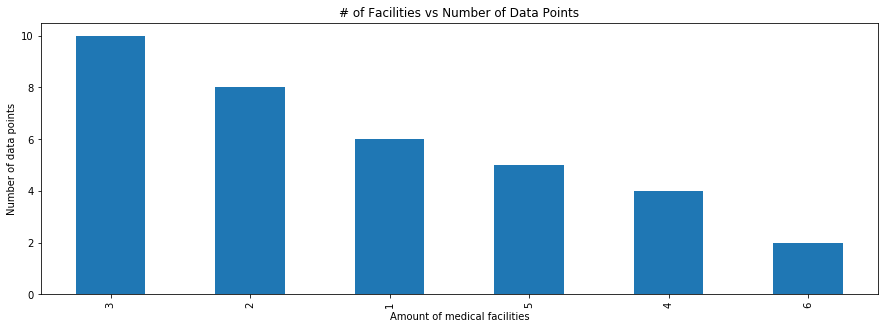

In [6]:
#Created a histogram to view the data. 
histogram = avg_score_total_medical['Amount of Medical Facilities'].value_counts().plot.bar(figsize=(15,5),title='# of Facilities vs Number of Data Points')


histogram.set_xlabel("Amount of medical facilities")
histogram.set_ylabel("Number of data points")


This histogram shows the amount of data points for the amount of medical facilities. 

##### There are 10 data points that have three medical facilities
#### 8 data points that have 2 medical facilities
#### 6 data points that have 1 medical facility
#### 5 data points that have five medical facilities
#### 4 data points that have 4 medical facilities
#### 2 data points that have 6 medical facilities.

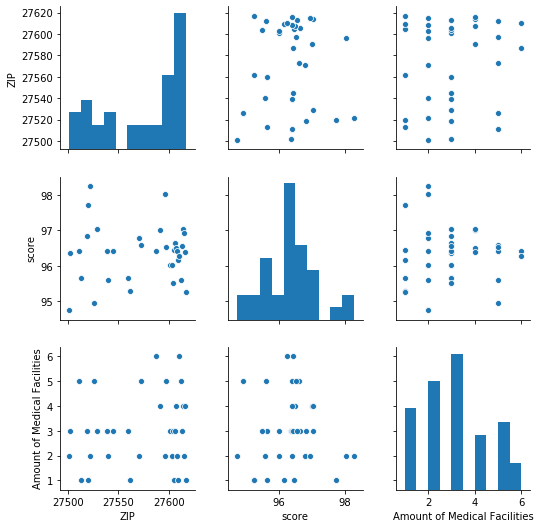

In [7]:
pair = sns.pairplot(avg_score_total_medical)

The pairplot doesn't feature any relationships at all. Everything is pretty uniform. Out of all relationships the 'Zip and Amount of Medical Facilities' is the most prominent. I'm going to create a scatter plot to further investigate this.

Text(0, 0.5, 'Inspection Score')

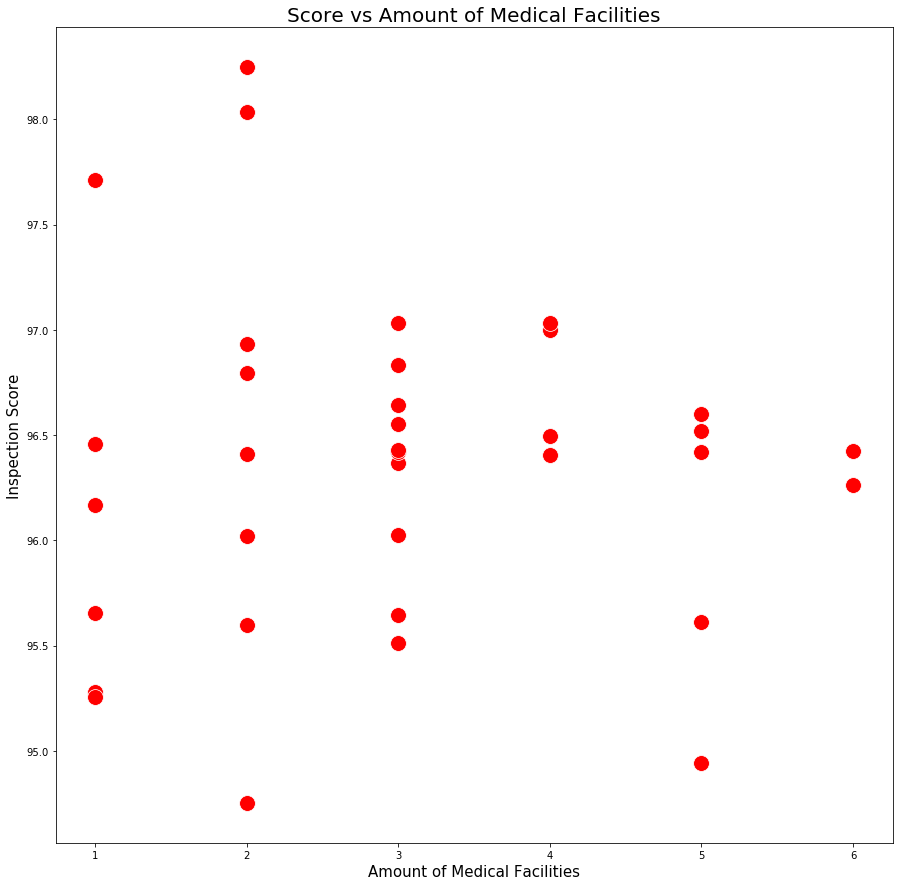

In [8]:
area = (15, 15)





ax = plt.subplots(figsize=area)

scatterplot = sns.scatterplot(x="Amount of Medical Facilities", y="score", data = avg_score_total_medical, s= 250, color = 'red')
scatterplot.set_title("Score vs Amount of Medical Facilities", fontsize=20)
scatterplot.tick_params(labelsize=10)
scatterplot.set_xlabel('Amount of Medical Facilities', fontsize=15)
scatterplot.set_ylabel('Inspection Score', fontsize = 15)



This line graph shows the non-existent relationship between the amount of mediical facilties and the inspection score. As you can see, as you increase in the amount of medical facilities, there is not increase or descrease in inspection scores

In [9]:
correlation = avg_score_total_medical.corr(method ='pearson') 
print(correlation)

                                   ZIP     score  Amount of Medical Facilities
ZIP                           1.000000  0.036962                      0.123157
score                         0.036962  1.000000                     -0.017179
Amount of Medical Facilities  0.123157 -0.017179                      1.000000


Hypothesis was proven incorrect, no relationship was found between amount of medical facilities and the inspection score rating. This was because 0.12 is not close enough to 0.25 to be considered a minor relationship

In data, I did not have enough medical facilities for each zipcode. This was because the inspections document had a small amount of zip codes compared to the emergency medical facilities zipcode. A more comprehensive dataset with restaurant inspections for the zipcodes for each facility would have improved this data analysis.

# Ethics and Privacy 
When it comes to the ethics of this experiment, I attempted my best to keep it the least invasive as possible. What I mean by this is that I tried to avoid personal datas such as the life activities of employees and the way a restaurant operates when it comes to cleanliness. The majority of the data used for this experiment were cold hard numbers such as the location (longitude and latitude) of the emergency medical service and restaurants listed in the provided dataset. However, one ethical issue that I discovered after completing my data-analysis was that it could be problematic to assume causation between the health inspection score of a restaurant with its proximity to a nearby emergency medical service. The reason being that there are other factors that could come into play such as the employees perform, failing management, or poor ingredients that would worsen the score.

# Conclusion & Discussion

After completing the experiment, I have come to the conclusion that there is no relationship present when it comes to the amount of medical facilities and a restaurant's health inspection score that are both in the same zip code. Unfortunenately, my hypothesis that stated that restaurents that are in the same zip code as multiple emergency medical services will have lower health inspection score, was incorrect. The reason being that the R score did not pass the 0.25 threshold in order to establish a minor relationship between the two. Moving forward, I could improve the quality of this experiment by observing inspection scores nation-wide rather than just the state of North Carolina, as it will provide me with more data and information to work with. 